# Perkenalan

Nama : Febrian Hendifa

Batch : FTDS-016-RMT

Query : select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
from `bigquery-public-data.ml_datasets.credit_card_default`
limit 31952 (16*1997)

Dataset : credit_card_default

Objektive : Melakukan prediksi untuk pembayaran pada bulan depan

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split,StratifiedKFold

from scipy.stats import kendalltau
import scipy.stats as stats
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib, json

# Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1M1_Febrian_Hendifa.csv')

In [3]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [4]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [5]:
data.shape

(2965, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [7]:
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Terlihat bahwa tidak ada missing values pada dataset ini

In [8]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [9]:
# Duplicate Dataset

data_duplicate = data.copy()

# Exploratory Data Analysis (EDA)

## Info Data

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2=No consumption, -1=pay duly, 0: The use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Payment Next Month

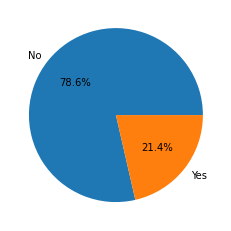

In [10]:
inter=data['default_payment_next_month'].value_counts()
plt.pie(inter,labels=['No','Yes'],autopct='%0.1f%%',radius=1);

Pada data ini terlihar jika untuk pembayaran pada bulan depan lebih banyak No dengan 78,6% dan Yes 21,4%

## Sex

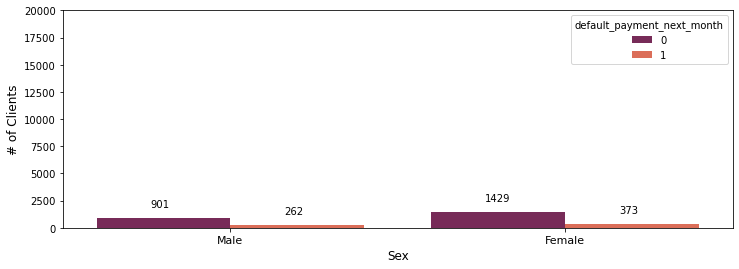

In [11]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'sex', hue="default_payment_next_month", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

Pada data ini terlihat bahwa pada jenis kelamin male untuk data No 901 dan Yes 262 sedangkan pada female untuk No 1429 dan Yes 373

## Limit Balance

In [12]:
data['LimitBin'] = pd.cut(data['limit_balance'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        771
(200000, 300000]     522
(50000, 100000]      483
(100000, 150000]     408
(150000, 200000]     373
(300000, 400000]     258
(400000, 500000]     136
(500000, 1100000]     14
Name: LimitBin, dtype: int64


Pada data ini menunjukkan bahwa untuk pemberian batas peminjaman paling banyak di 5000-50000

## Numerical Features

In [13]:
# Using OrdinalEncoder to rank payment_next_month
enc = OrdinalEncoder()

payment_next_month = data.copy()
enc.fit(payment_next_month[['default_payment_next_month']])
payment_next_month[['default_payment_next_month']] = enc.transform(payment_next_month[['default_payment_next_month']])

payment_next_month = payment_next_month['default_payment_next_month']
payment_next_month

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
2960    1.0
2961    0.0
2962    0.0
2963    0.0
2964    0.0
Name: default_payment_next_month, Length: 2965, dtype: float64

In [14]:
# Creating new dataframe for temperature with payment
numerical_cols = ['limit_balance','sex','education_level','marital_status','age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 
'pay_amt_5', 'pay_amt_6']
data_num = data[numerical_cols]
data_num.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,3,0,50,0,0,0,-1,-1,...,0,3400,2769,0,2266,0,3400,2769,1700,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,0,399,1396,0,2430,0,399,1396,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
3,230000,1,2,1,41,0,0,0,0,0,...,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
4,50000,1,2,1,42,0,0,0,0,0,...,30660,31320,36227,35569,2007,2000,1500,5400,0,3000


In [15]:
# Concatenate data numerical and the labeled target (income_bracket)
df_num = pd.concat([data_num, payment_next_month], axis=1).sort_index()
df_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0.0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0.0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0.0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1.0
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1.0
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0.0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0.0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0.0


**Correlation Matrix for numerical features**

<AxesSubplot:>

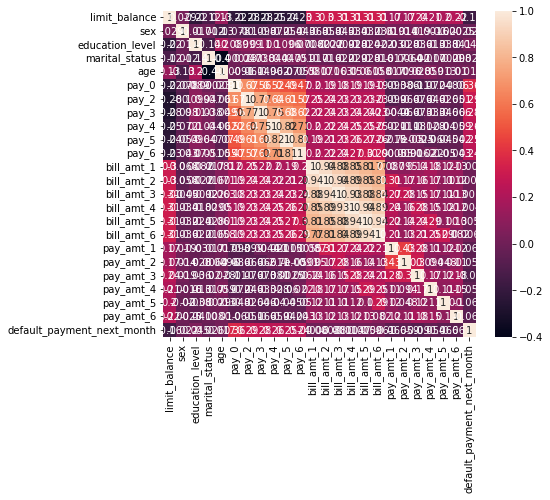

In [16]:
# Plotting Correlation Matrix of Temperature and Price
plt.figure(figsize=(7,6))
sns.heatmap(df_num.corr(),annot=True)

# Data Preprocessing

## Get Model Inference

In [17]:
# Sampling data for Model Inference

data_inf = data.sample(10, random_state=42)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
2882,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
2071,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2725,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
1684,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
2691,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
1419,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
1323,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
810,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
1672,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
332,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


In [18]:
# Remove Inference Set from dataset.
data_train_test = data.drop(data_inf.index)

In [19]:
# Reset the index.
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Saya mengambil 10 data untuk dijadikan sebagai model inference

## Splitting dataset to X and y

In [20]:
# drop column target from X
X = data_train_test.drop(['default_payment_next_month'], axis='columns')

# copy column target to y
y = data_train_test['default_payment_next_month'].copy()

Saya menjadikan kolom default_payment_next_month sebagai data target

### Over sampling and Under sampling

In [21]:
y.value_counts()

0    2322
1     633
Name: default_payment_next_month, dtype: int64

In [22]:
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X, y)

In [23]:
y_res.value_counts()

0    2322
1    2322
Name: default_payment_next_month, dtype: int64

### Splitting dataset to Train Set and Test Set

In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print('Train size : ', X_train.shape)
print('Test size. : ', X_test.shape)

Train size :  (3715, 24)
Test size. :  (929, 24)


In [25]:
# Calling features variable train set
X_train.sort_index()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,LimitBin
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,"(5000, 50000]"
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,"(150000, 200000]"
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,"(100000, 150000]"
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,"(200000, 300000]"
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,"(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,220000,2,1,1,41,7,6,5,4,3,...,227800,225044,222356,0,0,0,0,0,6000,"(200000, 300000]"
4637,100000,1,3,1,35,2,2,0,0,2,...,97227,88899,93766,0,3500,7000,0,7000,0,"(50000, 100000]"
4638,50000,1,3,2,46,0,0,0,0,0,...,20162,19864,19680,1852,4050,676,730,866,3000,"(5000, 50000]"
4641,50000,2,2,2,30,1,3,2,2,2,...,48439,49418,50326,0,2000,2000,1900,1900,1900,"(5000, 50000]"


In [26]:
# Calling features variable test set
X_test.sort_index()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,LimitBin
8,90000,2,2,1,35,2,0,0,0,0,...,52540,56236,40922,2700,2500,1900,4600,0,1600,"(50000, 100000]"
12,180000,2,2,1,34,0,0,0,0,0,...,168608,132202,129918,8083,7296,5253,4814,4816,3800,"(150000, 200000]"
17,150000,2,1,1,45,0,0,0,0,0,...,131292,134011,136711,3575,3647,3678,3793,3835,3952,"(100000, 150000]"
19,50000,2,2,1,45,0,0,0,0,0,...,31459,28901,29523,2080,1690,1458,1100,1076,1094,"(5000, 50000]"
23,140000,1,2,1,29,0,0,0,0,0,...,132038,131961,124256,6696,5000,4866,5300,5055,5000,"(100000, 150000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,300000,2,3,2,30,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(200000, 300000]"
4632,20000,2,2,1,38,1,-1,-1,-2,-2,...,0,0,0,2000,0,0,0,0,0,"(5000, 50000]"
4639,300000,2,1,1,30,0,0,0,0,0,...,76244,67747,70389,3000,5000,2500,2500,3500,87000,"(200000, 300000]"
4640,200000,2,3,1,49,2,-1,2,2,2,...,56205,54723,58657,52439,0,6000,0,5000,2286,"(150000, 200000]"


In [27]:
# Calling target variable train set
y_train.sort_index

<bound method Series.sort_index of 3979    1
2567    0
14      0
3210    1
3576    1
       ..
4426    1
466     0
3092    1
3772    1
860     0
Name: default_payment_next_month, Length: 3715, dtype: int64>

In [28]:
# Calling target variable test set
y_test.sort_index()

8       1
12      0
17      0
19      0
23      0
       ..
4620    1
4632    1
4639    1
4640    1
4643    1
Name: default_payment_next_month, Length: 929, dtype: int64

## Handling Outliers

In [29]:
# Creating a function to print the skewness
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    # print(f'\'{data.name}\'kurtosis: {data.kurt()}')
    if data.skew() > 0.5:
        print ('Right skewed')
    elif data.skew() < -0.5:
        print( 'Left Skewed')
    else:
        print("Normal Distribution")

In [30]:
# Creating a function to visualize the data
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=65, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Probability Density')
    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

    # label the plot
    plt.legend(['Normal PDF(Probability Density Function) ', 'Histogram: Load Weight'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2)
    plt.show()

'limit_balance' skewness: 1.0961455092646009
Right skewed


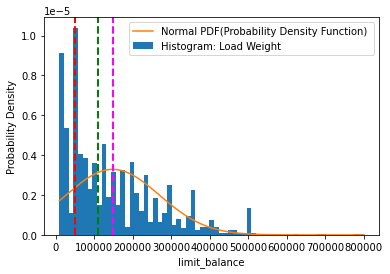

In [31]:
# Visualizing skewed data for X_train
visualize_data(X_train.limit_balance)

'limit_balance' skewness: 1.006122595071449
Right skewed


c:\Users\Intel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


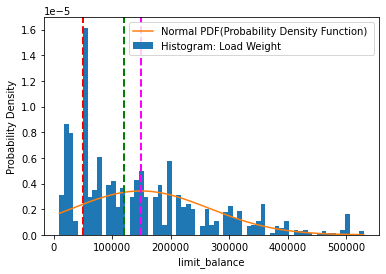

In [32]:
# Visualizing skewed data for X_test
visualize_data(X_test.limit_balance)

## Handling Missing Values

In [33]:
# Check missing values
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
LimitBin           0
dtype: int64

In [34]:
# Check missing values in X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
LimitBin           0
dtype: int64

Disini data pada X_train dan X_test tidak ada yang mengalami missing value

### Split Dataset to Numerical and Categorical Columns

In [35]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


In [36]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
3979,20000,2,2,2,22,0,0,2,2,2,...,2829,3920,1997,1317,4500,0,1700,0,100,0
2567,510000,2,2,1,38,0,0,0,0,0,...,37361,39437,40292,41153,2000,2700,2700,1500,1500,10000
14,400000,2,2,1,24,0,0,0,0,0,...,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100
3210,120000,2,2,3,59,2,2,2,2,2,...,85919,86910,87893,86370,0,7898,3300,3300,0,3149
3576,170000,2,2,1,46,-1,-1,-1,-2,-1,...,0,0,1542,3498,1848,0,0,1542,3498,8095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,200000,1,2,1,41,0,0,0,0,0,...,46472,48692,50571,51756,4000,2000,3000,3000,2000,2000
466,350000,1,1,1,49,-2,-2,-2,-2,-2,...,1518,4625,363,858,4213,1529,4713,363,858,566
3092,140000,1,3,1,47,-1,-1,-1,2,0,...,792,884,488,1092,500,792,488,0,1000,0
3772,300000,1,1,2,32,2,0,0,0,0,...,258394,261024,260672,263894,9106,11000,11009,10000,10000,10000


### Feature  Scaling

In [37]:
X_train_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
3979,20000,2,2,2,22,0,0,2,2,2,...,2829,3920,1997,1317,4500,0,1700,0,100,0
2567,510000,2,2,1,38,0,0,0,0,0,...,37361,39437,40292,41153,2000,2700,2700,1500,1500,10000
14,400000,2,2,1,24,0,0,0,0,0,...,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100
3210,120000,2,2,3,59,2,2,2,2,2,...,85919,86910,87893,86370,0,7898,3300,3300,0,3149
3576,170000,2,2,1,46,-1,-1,-1,-2,-1,...,0,0,1542,3498,1848,0,0,1542,3498,8095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,200000,1,2,1,41,0,0,0,0,0,...,46472,48692,50571,51756,4000,2000,3000,3000,2000,2000
466,350000,1,1,1,49,-2,-2,-2,-2,-2,...,1518,4625,363,858,4213,1529,4713,363,858,566
3092,140000,1,3,1,47,-1,-1,-1,2,0,...,792,884,488,1092,500,792,488,0,1000,0
3772,300000,1,1,2,32,2,0,0,0,0,...,258394,261024,260672,263894,9106,11000,11009,10000,10000,10000


In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Pada Feature Scaling ini menggunakan MinMaxScaler karna pada datanya terdapat skewness yaitu "Right Skewed"

### Feature Encoding

In [39]:
ohc_enc = OneHotEncoder(drop="first", handle_unknown="ignore")
ohc_enc.fit(X_train_cat)

X_train_ohc_encoded = ohc_enc.transform(X_train_cat).toarray()
X_test_ohc_encoded = ohc_enc.transform(X_train_cat).toarray()

X_train_ohc_encoded

array([], shape=(3715, 0), dtype=float64)

### Feature Selection with Chi Square

In [40]:
features_candidate = ['sex', 'education_level', 'marital_status', 'pay_0', 
                      'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for feature in features_candidate:
    contingency_table = pd.crosstab(X_train[feature], y_train)
    # display(contingency_table)

    chi2, pvalue, dof, expected = stats.chi2_contingency(observed=contingency_table)
    print("column {0}; pvalue = {1:.2f} <= 5%: {2}"
        .format(feature, pvalue, pvalue <= 0.05))

del features_candidate, feature

column sex; pvalue = 0.04 <= 5%: True
column education_level; pvalue = 0.00 <= 5%: True
column marital_status; pvalue = 0.00 <= 5%: True
column pay_0; pvalue = 0.00 <= 5%: True
column pay_2; pvalue = 0.00 <= 5%: True
column pay_3; pvalue = 0.00 <= 5%: True
column pay_4; pvalue = 0.00 <= 5%: True
column pay_5; pvalue = 0.00 <= 5%: True
column pay_6; pvalue = 0.00 <= 5%: True


In [41]:
X_train.drop(['sex', 'marital_status'], axis=1, inplace=True)
X_test.drop(['sex', 'marital_status'], axis=1, inplace=True)

Disini pada kolom "sex" dan "marital_status" tidak memiliki ketergantungan yang signifikan terhadap kolom "default_payment_next_month" jadi saya melakukan drop pada kolom tersebut

## Feature Selection

In [42]:
X_train

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,LimitBin
3979,20000,2,22,0,0,2,2,2,2,4400,...,3920,1997,1317,4500,0,1700,0,100,0,"(5000, 50000]"
2567,510000,2,38,0,0,0,0,0,0,95589,...,39437,40292,41153,2000,2700,2700,1500,1500,10000,"(500000, 1100000]"
14,400000,2,24,0,0,0,0,0,0,187790,...,89128,39276,23440,5519,44776,1502,2026,1015,52100,"(300000, 400000]"
3210,120000,2,59,2,2,2,2,2,2,82172,...,86910,87893,86370,0,7898,3300,3300,0,3149,"(100000, 150000]"
3576,170000,2,46,-1,-1,-1,-2,-1,-1,2741,...,0,1542,3498,1848,0,0,1542,3498,8095,"(150000, 200000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,200000,2,41,0,0,0,0,0,0,51995,...,48692,50571,51756,4000,2000,3000,3000,2000,2000,"(150000, 200000]"
466,350000,1,49,-2,-2,-2,-2,-2,-2,27506,...,4625,363,858,4213,1529,4713,363,858,566,"(300000, 400000]"
3092,140000,3,47,-1,-1,-1,2,0,0,292,...,884,488,1092,500,792,488,0,1000,0,"(100000, 150000]"
3772,300000,1,32,2,0,0,0,0,0,255299,...,261024,260672,263894,9106,11000,11009,10000,10000,10000,"(200000, 300000]"


### Feature Selection with Chi-Squared

In [43]:
features_candidate = ['education_level','age', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
                      'pay_5', 'pay_6']

for feature in features_candidate:
    contingency_table = pd.crosstab(X_train[feature], y_train)
    # display(contingency_table)

    chi2, pvalue, dof, expected = stats.chi2_contingency(observed=contingency_table)
    print("column {0}; pvalue = {1:.2f} <= 5%: {2}"
        .format(feature, pvalue, pvalue <= 0.05))

del features_candidate, feature

column education_level; pvalue = 0.00 <= 5%: True
column age; pvalue = 0.00 <= 5%: True
column pay_0; pvalue = 0.00 <= 5%: True
column pay_2; pvalue = 0.00 <= 5%: True
column pay_3; pvalue = 0.00 <= 5%: True
column pay_4; pvalue = 0.00 <= 5%: True
column pay_5; pvalue = 0.00 <= 5%: True
column pay_6; pvalue = 0.00 <= 5%: True


### Split Dataset to Numerical and Categorical Columns

In [44]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


### Split Dataset to Train Set and Test Set

In [45]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

## Feature Scaling

In [46]:
X_train_num

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
3979,20000,2,22,0,0,2,2,2,2,4400,...,2829,3920,1997,1317,4500,0,1700,0,100,0
2567,510000,2,38,0,0,0,0,0,0,95589,...,37361,39437,40292,41153,2000,2700,2700,1500,1500,10000
14,400000,2,24,0,0,0,0,0,0,187790,...,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100
3210,120000,2,59,2,2,2,2,2,2,82172,...,85919,86910,87893,86370,0,7898,3300,3300,0,3149
3576,170000,2,46,-1,-1,-1,-2,-1,-1,2741,...,0,0,1542,3498,1848,0,0,1542,3498,8095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,200000,2,41,0,0,0,0,0,0,51995,...,46472,48692,50571,51756,4000,2000,3000,3000,2000,2000
466,350000,1,49,-2,-2,-2,-2,-2,-2,27506,...,1518,4625,363,858,4213,1529,4713,363,858,566
3092,140000,3,47,-1,-1,-1,2,0,0,292,...,792,884,488,1092,500,792,488,0,1000,0
3772,300000,1,32,2,0,0,0,0,0,255299,...,258394,261024,260672,263894,9106,11000,11009,10000,10000,10000


In [47]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled

array([[2.65822785e-01, 3.33333333e-01, 1.66666667e-01, ...,
        1.61325442e-03, 8.29745072e-04, 1.60099133e-03],
       [2.40506329e-01, 3.33333333e-01, 5.41666667e-01, ...,
        0.00000000e+00, 1.42216244e-02, 5.84386617e-03],
       [1.01265823e-01, 3.33333333e-01, 6.25000000e-02, ...,
        2.47431659e-02, 9.27665298e-03, 4.95662949e-03],
       ...,
       [8.86075949e-02, 3.33333333e-01, 3.95833333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.78481013e-01, 3.33333333e-01, 1.87500000e-01, ...,
        3.16514579e-02, 2.31916325e-05, 1.52961586e-02],
       [2.53164557e-02, 3.33333333e-01, 5.00000000e-01, ...,
        3.95890655e-03, 0.00000000e+00, 3.96530359e-03]])

Disini saya melakukan penskalaan dengan menggunakan MinMax karna terdapat Right Skewed dengan rentan 0-1

## Feature Encoding

In [48]:
ohc_enc = OneHotEncoder(drop="first", handle_unknown="ignore")
ohc_enc.fit(X_train_cat)

X_train_ohc_encoded = ohc_enc.transform(X_train_cat).toarray()
X_test_ohc_encoded = ohc_enc.transform(X_test_cat).toarray()

X_train_ohc_encoded

array([], shape=(3715, 0), dtype=float64)

## Concate numerical and categorical columns

In [49]:
X_train_final = np.concatenate([X_train_num_scaled,
                                X_train_ohc_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled,
                               X_test_ohc_encoded], axis=1)

X_train_final

array([[1.26582278e-02, 3.33333333e-01, 2.08333333e-02, ...,
        0.00000000e+00, 2.57684805e-04, 0.00000000e+00],
       [6.32911392e-01, 3.33333333e-01, 3.54166667e-01, ...,
        7.42294978e-03, 3.86527208e-03, 2.47831475e-02],
       [4.93670886e-01, 3.33333333e-01, 6.25000000e-02, ...,
        1.00259308e-02, 2.61550077e-03, 1.29120198e-01],
       ...,
       [1.64556962e-01, 5.00000000e-01, 5.41666667e-01, ...,
        0.00000000e+00, 2.57684805e-03, 0.00000000e+00],
       [3.67088608e-01, 1.66666667e-01, 2.29166667e-01, ...,
        4.94863319e-02, 2.57684805e-02, 2.47831475e-02],
       [1.26582278e-02, 3.33333333e-01, 4.16666667e-01, ...,
        5.34452384e-04, 6.12516782e-03, 3.90136307e-02]])

# Model Definition

## Logistic Regression

In [50]:
logreg = LogisticRegression(max_iter=1000000)

## SVM

In [51]:
svm = SVC()

## Decision Tree

In [52]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

## Random Forest

In [53]:
rf = RandomForestClassifier()

## KNN

In [54]:
knn = KNeighborsClassifier()

## Naive Bayes

In [55]:
nb = GaussianNB()

# Model Training

## Logistic Regression

In [56]:
logreg.fit( X_train_final, y_train )

LogisticRegression(max_iter=1000000)

## SVM

In [57]:
svm.fit( X_train_final, y_train )

SVC()

## Decision Tree

In [58]:
dt.fit( X_train_final, y_train )

DecisionTreeClassifier(max_depth=4, random_state=42)

## Random Forest

In [59]:
rf.fit( X_train_final, y_train )

RandomForestClassifier()

## KNN

In [60]:
knn.fit( X_train_final, y_train )

KNeighborsClassifier()

## Naive Bayes

In [61]:
nb.fit( X_train_final, y_train )

GaussianNB()

# Model Evaluation

In [62]:
def print_accuracy_score(y_true, y_pred):
    print('Accuracy Score', accuracy_score(y_true=y_true, y_pred=y_pred))

In [63]:
def print_confusion_matrix(y_true, y_pred, model):
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print(classification_report(y_true=y_true, y_pred=y_pred, zero_division=0))

In [64]:
def save_model(folder_name, model):
    with open('model/{0}/v1/model.pkl'.format(folder_name), 'wb') as file_1:
        joblib.dump(model, file_1)

    with open('model/{0}/v1/scaler.pkl'.format(folder_name), 'wb') as file_2:
        joblib.dump(scaler, file_2)

    with open('model/{0}/v1/ohc_enc.pkl'.format(folder_name), 'wb') as file_3:
        joblib.dump(ohc_enc, file_3)

    with open('model/{0}/v1/num_columns.txt'.format(folder_name), 'w') as file_4:
        json.dump(num_columns, file_4)

    with open('model/{0}/v1/cat_columns.txt'.format(folder_name), 'w') as file_5:
        json.dump(cat_columns, file_5)

## Logistic Regression

In [65]:
y_train_pred_logreg = logreg.predict(X=X_train_final)
y_test_pred_logreg = logreg.predict(X=X_test_final)

In [66]:
print_accuracy_score(y_train, y_train_pred_logreg)
print_accuracy_score(y_test, y_test_pred_logreg)

Accuracy Score 0.6990578734858681
Accuracy Score 0.6803013993541442


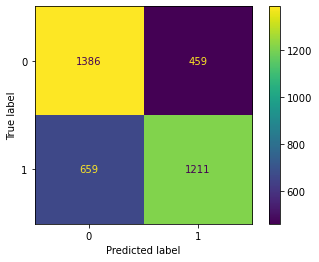

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1845
           1       0.73      0.65      0.68      1870

    accuracy                           0.70      3715
   macro avg       0.70      0.70      0.70      3715
weighted avg       0.70      0.70      0.70      3715



In [67]:
print_confusion_matrix(y_train, y_train_pred_logreg, logreg)

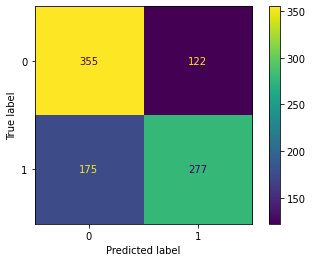

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       477
           1       0.69      0.61      0.65       452

    accuracy                           0.68       929
   macro avg       0.68      0.68      0.68       929
weighted avg       0.68      0.68      0.68       929



In [68]:
print_confusion_matrix(y_test, y_test_pred_logreg, logreg)

## SVM

In [69]:
y_train_pred_svm = svm.predict(X=X_train_final)
y_test_pred_svm = svm.predict(X=X_test_final)

In [70]:
print_accuracy_score(y_train, y_train_pred_svm)
print_accuracy_score(y_test, y_test_pred_svm)

Accuracy Score 0.7504710632570659
Accuracy Score 0.7179763186221744


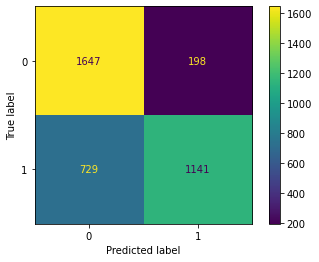

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1845
           1       0.85      0.61      0.71      1870

    accuracy                           0.75      3715
   macro avg       0.77      0.75      0.75      3715
weighted avg       0.77      0.75      0.75      3715



In [71]:
print_confusion_matrix(y_train, y_train_pred_svm, svm)

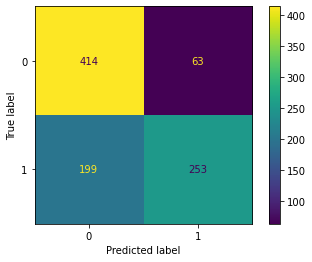

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       477
           1       0.80      0.56      0.66       452

    accuracy                           0.72       929
   macro avg       0.74      0.71      0.71       929
weighted avg       0.74      0.72      0.71       929



In [72]:
print_confusion_matrix(y_test, y_test_pred_svm, svm)

## Decision Tree

In [73]:
y_train_pred_dt = dt.predict(X=X_train_final)
y_test_pred_dt = dt.predict(X=X_test_final)

In [74]:
print_accuracy_score(y_train, y_train_pred_dt)
print_accuracy_score(y_test, y_test_pred_dt)

Accuracy Score 0.7375504710632571
Accuracy Score 0.6996770721205597


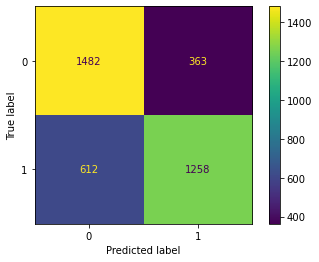

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1845
           1       0.78      0.67      0.72      1870

    accuracy                           0.74      3715
   macro avg       0.74      0.74      0.74      3715
weighted avg       0.74      0.74      0.74      3715



In [75]:
print_confusion_matrix(y_train, y_train_pred_dt, dt)

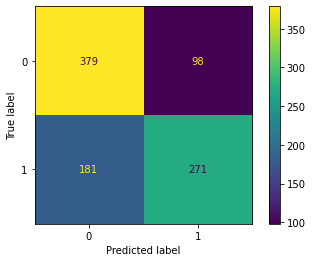

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       477
           1       0.73      0.60      0.66       452

    accuracy                           0.70       929
   macro avg       0.71      0.70      0.70       929
weighted avg       0.70      0.70      0.70       929



In [76]:
print_confusion_matrix(y_test, y_test_pred_dt, dt)

## Random Forest

In [77]:
y_train_pred_rf = rf.predict(X=X_train_final)
y_test_pred_rf = rf.predict(X=X_test_final)

In [78]:
print_accuracy_score(y_train, y_train_pred_rf)
print_accuracy_score(y_test, y_test_pred_rf)

Accuracy Score 0.9997308209959623
Accuracy Score 0.9407965554359526


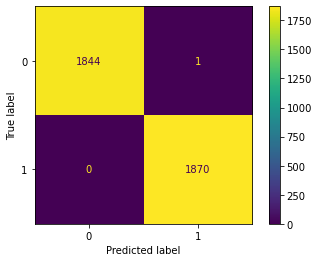

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1845
           1       1.00      1.00      1.00      1870

    accuracy                           1.00      3715
   macro avg       1.00      1.00      1.00      3715
weighted avg       1.00      1.00      1.00      3715



In [79]:
print_confusion_matrix(y_train, y_train_pred_rf, rf)

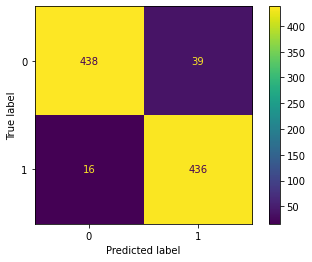

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       477
           1       0.92      0.96      0.94       452

    accuracy                           0.94       929
   macro avg       0.94      0.94      0.94       929
weighted avg       0.94      0.94      0.94       929



In [80]:
print_confusion_matrix(y_test, y_test_pred_rf, rf)

## KNN

In [81]:
y_train_pred_knn = knn.predict(X=X_train_final)
y_test_pred_knn = knn.predict(X=X_test_final)

In [82]:
print_accuracy_score(y_train, y_train_pred_knn)
print_accuracy_score(y_test, y_test_pred_knn)

Accuracy Score 0.8454912516823688
Accuracy Score 0.736275565123789


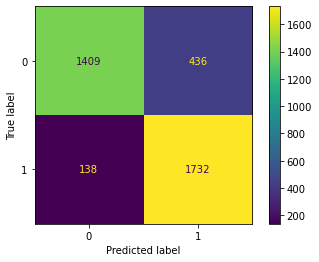

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1845
           1       0.80      0.93      0.86      1870

    accuracy                           0.85      3715
   macro avg       0.85      0.84      0.84      3715
weighted avg       0.85      0.85      0.84      3715



In [83]:
print_confusion_matrix(y_train, y_train_pred_knn, knn)

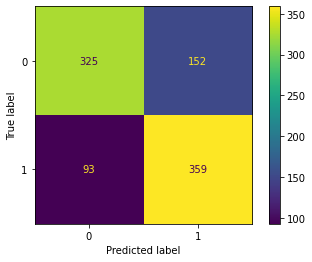

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       477
           1       0.70      0.79      0.75       452

    accuracy                           0.74       929
   macro avg       0.74      0.74      0.74       929
weighted avg       0.74      0.74      0.74       929



In [84]:
print_confusion_matrix(y_test, y_test_pred_knn, knn)

## Naive Bayes

In [85]:
y_train_pred_nb = nb.predict(X=X_train_final)
y_test_pred_nb = nb.predict(X=X_test_final)

In [86]:
print_accuracy_score(y_train, y_train_pred_nb)
print_accuracy_score(y_test, y_test_pred_nb)

Accuracy Score 0.5792732166890983
Accuracy Score 0.5651237890204521


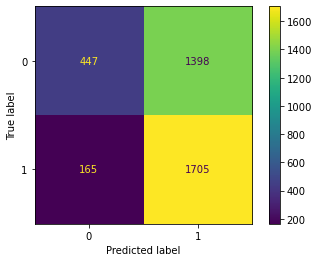

              precision    recall  f1-score   support

           0       0.73      0.24      0.36      1845
           1       0.55      0.91      0.69      1870

    accuracy                           0.58      3715
   macro avg       0.64      0.58      0.52      3715
weighted avg       0.64      0.58      0.53      3715



In [87]:
print_confusion_matrix(y_train, y_train_pred_nb, nb)

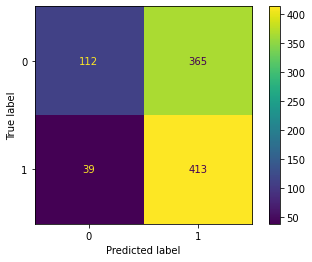

              precision    recall  f1-score   support

           0       0.74      0.23      0.36       477
           1       0.53      0.91      0.67       452

    accuracy                           0.57       929
   macro avg       0.64      0.57      0.51       929
weighted avg       0.64      0.57      0.51       929



In [88]:
print_confusion_matrix(y_test, y_test_pred_nb, nb)

## Hasil Model Evaluation

Dari ke-6 pemodelan diatas hasilnya adalah Logistic Regression dengan akurasi 0.69,0.68, SVM dengan akurasi 0.73,0.72, Decision Tree dengan akurasi 1,0.89, Random Forest dengan akurasi 1,0.93, KNN dengan akurasi 0.85,0.73, dan Naive Bayes dengan akurasi 0.58.0.55. Disini terlihat jika Random Forest lah yang memiliki nilai akurasi yang tinggi dibandingkan yang lain.

## Cross Validation

In [89]:
f1_score_train_cross_val = cross_val_score(logreg,
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66556291 0.68358714 0.68358714 0.65410959 0.70646766 0.6932409 ]
F1 Score - Mean - Cross Validation :  0.6810925577888266
F1 Score - Std - Cross Validation  :  0.01719095921681104
F1 Score - Range of Test-Set       :  0.6639015985720156 - 0.6982835170056376


In [90]:
f1_score_train_cross_val = cross_val_score(svm, 
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67172676 0.68926554 0.72084806 0.66171004 0.71192661 0.68208092]
F1 Score - Mean - Cross Validation :  0.6895929860022137
F1 Score - Std - Cross Validation  :  0.020931910717306493
F1 Score - Range of Test-Set       :  0.6686610752849073 - 0.7105248967195202


In [91]:
f1_score_train_cross_val = cross_val_score(dt, 
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68231047 0.62650602 0.71180556 0.62475442 0.69565217 0.7220339 ]
F1 Score - Mean - Cross Validation :  0.6771770902693947
F1 Score - Std - Cross Validation  :  0.038502461807112046
F1 Score - Range of Test-Set       :  0.6386746284622826 - 0.7156795520765067


In [92]:
f1_score_train_cross_val = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.90881459 0.92496172 0.92259084 0.93478261 0.92644757 0.92556634]
F1 Score - Mean - Cross Validation :  0.923860611363642
F1 Score - Std - Cross Validation  :  0.007725492955347693
F1 Score - Range of Test-Set       :  0.9161351184082942 - 0.9315861043189897


In [93]:
f1_score_train_cross_val = cross_val_score(knn, 
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.7797619  0.74242424 0.75522388 0.76030534 0.76390977 0.76615385]
F1 Score - Mean - Cross Validation :  0.7612964986474248
F1 Score - Std - Cross Validation  :  0.011294655015844281
F1 Score - Range of Test-Set       :  0.7500018436315805 - 0.772591153663269


In [94]:
f1_score_train_cross_val = cross_val_score(nb, 
                                           X_train_final, 
                                           y_train, 
                                           cv=6, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70501836 0.68674699 0.68660287 0.67307692 0.69387755 0.67892157]
F1 Score - Mean - Cross Validation :  0.6873740435571846
F1 Score - Std - Cross Validation  :  0.010250669892525288
F1 Score - Range of Test-Set       :  0.6771233736646592 - 0.6976247134497099


Setelah dilakukan Cross validation dari ke-6 model tersebut terlihat nilai 'mean' dan 'std' dari setiap model dan model dengan nilai 'mean' dan 'std' yang tinggi adalah pemodelan Random Forest dengan nilai meannya 0.92 dan nilai stdnya 0.012

## Hyperparameter Tuning Random Forest

In [95]:
params = {
    'min_samples_split' : np.arange(2,9),
    'max_depth' : np.arange(2,7)
}

rf = RandomForestClassifier()
#cv adalah nilai cross validation
rf_grid = GridSearchCV(rf, params, scoring ="accuracy", cv = 5, return_train_score=True)
rf_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='accuracy')

In [96]:
print(f"Best Scores: {rf_grid.best_score_}")
print(f"Best Params: {rf_grid.best_params_}")

Best Scores: 0.7633916554508748
Best Params: {'max_depth': 6, 'min_samples_split': 3}


# Model Inference

In [97]:
def load_model(folder_name):
    global model, scaler, ord_enc, ohc_enc, num_columns, ord_columns, ohc_columns
    
    with open('model/{0}/v1/model.pkl'.format(folder_name), 'rb') as file_1:
        model = joblib.load(file_1)

    with open('model/{0}/v1/scaler.pkl'.format(folder_name), 'rb') as file_2:
        scaler = joblib.load(file_2)

    with open('model/{0}/v1/ohc_enc.pkl'.format(folder_name), 'rb') as file_3:
        ohc_enc = joblib.load(file_3)

    with open('model/{0}/v1/num_columns.txt'.format(folder_name), 'r') as file_4:
        num_columns = json.load(file_4)

    with open('model/{0}/v1/ohc_columns.txt'.format(folder_name), 'r') as file_5:
        ohc_columns = json.load(file_5)

## Logistic Regression

In [98]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [99]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [100]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [101]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [102]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [103]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [104]:
# Predict using Logistic Regression

y_inf_pred_logreg = logreg.predict(X_inf_final)

In [105]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_logreg)

Accuracy Score 0.8


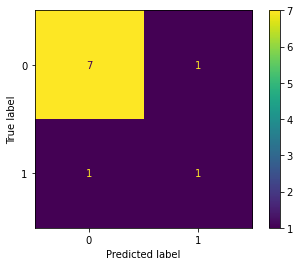

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



In [106]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_logreg, logreg)

## SVM

In [107]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [108]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [109]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [110]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [111]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [112]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [113]:
# Predict using Logistic Regression

y_inf_pred_svm = svm.predict(X_inf_final)

In [114]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_svm)

Accuracy Score 0.8


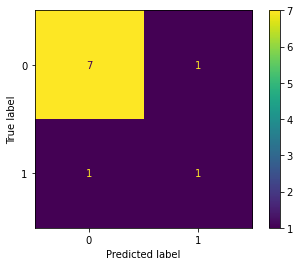

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



In [115]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_svm, svm)

## Decision Tree

In [116]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [117]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [118]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [119]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [120]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [121]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [122]:
# Predict using Decision Tree

y_inf_pred_dt = dt.predict(X_inf_final)

In [123]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_dt)

Accuracy Score 0.9


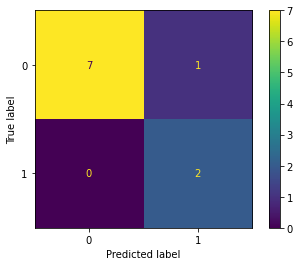

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



In [124]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_dt, dt)

## Random Forest

In [125]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [126]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [127]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [128]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [129]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [130]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [131]:
# Predict using Random Forest

y_inf_pred_rf = rf_grid.predict(X_inf_final)

In [132]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_rf)

Accuracy Score 0.8


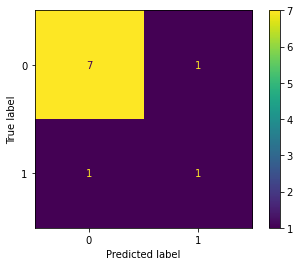

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



In [133]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_rf, rf_grid)

In [134]:
# Create DataFrame

y_pred_inf_df = pd.DataFrame(y_inf_pred_rf, columns=['Payment Next Month'])
y_pred_inf_df

,Payment Next Month
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


## KNN

In [135]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [136]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [137]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [138]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [139]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [140]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [141]:
# Predict using KNN

y_inf_pred_knn = knn.predict(X_inf_final)

In [142]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_knn)

Accuracy Score 0.5


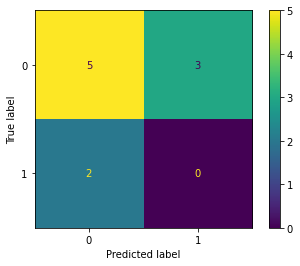

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.36      0.31      0.33        10
weighted avg       0.57      0.50      0.53        10



In [143]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_knn, knn)

## Naive Bayes

In [144]:
# Display Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,LimitBin
0,380000,1,1,2,33,0,0,0,0,0,...,89571,96627,10000,5000,5000,10000,10000,10000,0,"(300000, 400000]"
1,240000,1,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,"(200000, 300000]"
2,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,"(200000, 300000]"
3,450000,1,1,1,43,2,2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(400000, 500000]"
4,140000,2,2,2,38,0,0,0,0,0,...,79775,74462,4826,8000,3100,3000,5417,0,0,"(100000, 150000]"
5,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3198,4260,318,725,2592,3198,4260,4944,0,"(200000, 300000]"
6,310000,1,1,2,38,-2,-2,-2,-2,-2,...,1495,995,993,1005,1000,1502,1000,1000,0,"(300000, 400000]"
7,280000,2,2,2,33,0,0,0,0,0,...,18969,18381,1634,1649,1304,703,701,705,0,"(200000, 300000]"
8,80000,1,1,1,41,3,2,2,2,2,...,8864,9215,1200,0,800,0,500,900,1,"(50000, 100000]"
9,750000,2,1,1,41,0,0,0,0,-1,...,35485,4889,6817,2330,2705,50854,4913,550,0,"(500000, 1100000]"


### Split between Numerical Columns and Categorical Columns

In [145]:
# Split between Numerical Columns and Categorical Columns

X_inf_num = data_inf[num_columns]
X_inf_ohc = data_inf[cat_columns]

### Handling missing values

In [146]:
# Handling missing values

X_inf_num.isnull().sum()

limit_balance      0
education_level    0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [147]:
X_inf_ohc.isnull().sum()

Series([], dtype: float64)

### Feature Engineering

In [148]:
# Feature Scaling and Feature Encoding

X_inf_num_scaled = scaler.transform(X_inf_num)
X_inf_ohc_encoded = ohc_enc.transform(X_inf_ohc).toarray()

### Concate numerical and categorical columns

In [149]:
# Concate Numerical Columns and Categorical Columns

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_ohc_encoded], axis=1)

### Model Evaluation

In [150]:
# Predict using Naive Bayes

y_inf_pred_nb = nb.predict(X_inf_final)

In [151]:
print_accuracy_score(data_inf['default_payment_next_month'], y_inf_pred_nb)

Accuracy Score 0.5


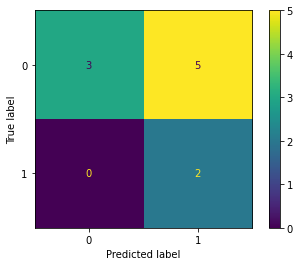

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.29      1.00      0.44         2

    accuracy                           0.50        10
   macro avg       0.64      0.69      0.49        10
weighted avg       0.86      0.50      0.53        10



In [152]:
print_confusion_matrix(data_inf['default_payment_next_month'], y_inf_pred_nb, nb)

# Pengambilan Kesimpulan

Dari data diatas untuk Payment Next Month lebih didominasi female untuk jenis kelaminnya, untuk Limit Balencenya lebih banyak di kisaran 5000-50000.
Dari hasil prediksian dengan pemodelan diatas dapat dilihat jika pemodelan Random Forest merupakan pemodelan yang terbaik jika dibandingkan dengan yang lainnya dan setelah dilakukan Cross Validation pemodelan Random Forest masih memiliki nilai yang bagus dibandingkan dengan yang lainnya.
Dan setelah dilakukan hasil Hyperparameter Tuning dengan menggunakan `GridSearchCV()` pada pemodelan Random Forest hasilnnya adalah nilai best scoresnya 0.75

# Conceptual Problems

## Soal

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

## Jawaban

1. Criterion pada secision tree merupakan paremeter untuk memisahkan atribut dari masih-masing kriteria. salah satunya akurasi merupakan criteria untuk memaksimalkan hasil dari seluruh akurasi dari setiap tree
2. Untuk mengidentifikasi dan membuang yang tidak diperlukan didalam pohon yang sudah terbentuk
3. Memilih K yang optimal adalah dengan cara mengambil data dengan jarak yang terdekat
4. Merupakan metode untuk mencari nilai akurasi yang terbaik
5. Untuk melihat hasil dari prediksi pemodelan yang sudah dibuat